<center>
    <h1>IA For HumanForYou - Groupe 2</h1>
<center>

<center>
    <h5> Vicente Vaz - Eliott Gouache - Anatole Couasnon - Marc Rouille | CESI ingénieur informatique</h2>
<center>

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

- Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

- Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

- Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

### Données fournies
Un certain nombre de données concernant les employés vous a donc été transmis par le service des ressources humaines.

Il s'agit de fichiers textes au format CSV.

Les données ont été anonymisées : un employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers qui suivent.

###  Données du service des ressources humaines

Pour chaque employé, le service des ressources humaines vous confie les informations en sa possession :

- Age : L'âge de l'employé en 2015.
- Attrition : L'objet de notre étude, est-ce que l'employé a quitté l'entreprise durant l'année 2016 ?
- BusinessTravel : A quel fréquence l'employé a été amené à se déplacer dans le cadre de son travail en 2015 ? (Non-Travel = jamais, Travel_Rarely= rarement, Travel_Frequently = fréquemment)
- DistanceFromHome : Distance en km entre le logement de l'employé et l'entreprise.
- Education : Niveau d'étude : 1=Avant College (équivalent niveau Bac), 2=College (équivalent Bac+2), 3=Bachelor (Bac+3), 4=Master (Bac+5) et 5=PhD (Thèse de doctorat).
- EducationField : Domaine d'étude, matière principale
- EmployeeCount : booléen à 1 si l'employé était compté dans les effectifs en 2015.
- EmployeeId : l'identifiant d'un employé
- Gender : Sexe de l'employé
- JobLevel : Niveau hiérarchique dans l'entreprise de 1 à 5
- JobRole : Métier dans l'entreprise
- MaritalStatus : Statut marital du salarié (Célibataire, Marié ou Divorcé).
- MonthlyIncome : Salaire brut en roupies par mois
- NumCompaniesWorked : Nombre d'entreprises pour lequel le salarié a travaillé avant de rejoindre HumanForYou.
- Over18 : Est-ce que le salarié a plus de 18 ans ou non ?
- PercentSalaryHike : % d'augmentation du salaire en 2015.
- StandardHours : Nombre d'heures par jour dans le contrat du salarié.
- StockOptionLevel : Niveau d'investissement en actions de l'entreprise par le salarié.
- TotalWorkingYears : Nombre d'années d'expérience en entreprise du salarié pour le même type de poste.
- TrainingTimesLastYear : Nombre de jours de formation en 2015
- YearsAtCompany : Ancienneté dans l'entreprise
- YearsSinceLastPromotion : Nombre d'années depuis la dernière augmentation individuelle
- YearsWithCurrentManager : Nombre d'années de collaboration sous la responsabilité du manager actuel de l'employé.


### Dernière évaluation du manager

Ce fichier contient la dernière évaluation de chaque employé faite pas son manager en février 2015.

Il contient les données suivantes :

- L'identifiant de l'employé : EmployeeID
- Une évaluation de son implication dans son travail notée 1 ('Faible'), 2 ("Moyenne"), 3 ("Importante") ou 4 ("Très importante") : JobInvolvement
- Une évaluation de son niveau de performance annuel pour l'entreprise notée 1 ("Faible"), 2 ("Bon"), 3 ("Excellent") ou 4 ("Au delà des attentes") : PerformanceRating


###  Enquête qualité de vie au travail

Ce fichier provient d'une enquête soumise aux employés en juin 2015 par le service RH pour avoir un retour concernant leur qualité de vie au travail.

Une organisation avait été mise en place pour que chacun puisse répondre à ce questionnaire sur son lieu de travail en concertation avec les managers mais il n'y avait pas d'obligation.

Les employés devaient répondre à 3 questions sur le niveau de satisfaction concernant :

- L'environnement de travail, noté 1 ("Faible"), 2 ("Moyen"), 3 ("Élevé") ou 4 ("Très élevé") : EnvironmentSatisfaction
- Son travail, noté de 1 à 4 comme précédemment : JobSatisfaction
- Son équilibre entre vie professionnelle et vie privée, noté 1 ("Mauvais"), 2 ("Satisfaisant"), 3 ("Très satisfaisant") ou 4 ("Excellent") : WorkLifeBalance

Lorsque un employé n'a pas répondu à une question, le texte "NA" apparaît à la place de la note.

###  Horaires de travail

Des badgeuses sont installées et utilisées dans l'entreprise depuis quelques années. Il a été jugé opportun par la direction de vous transmettre les horaires d'entrée et de sortie des employés sur une période de l'année choisie représentative d'une activité moyenne pour l'ensemble des services.

Vous trouverez donc 2 fichiers traçants les horaires d'arrivée à leur poste et de départ de leur poste de l'ensemble des employés par date sur une période allant du 1er janvier au 31 décembre 2015.


# Parameter

In [1]:
# draw or do not draw the graph
drawGraphics = True

# Import

In [34]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib

import os
import pandas as pd
import numpy as np
from six.moves import urllib

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from prettytable import PrettyTable

from sklearn.metrics import precision_score,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,confusion_matrix,roc_curve
from sklearn.model_selection import cross_validate

Using matplotlib backend: Qt5Agg


# Data initialization

## Data files fetching

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Snargol/projet-IA-CESI/main/"
DATA_PATH = os.path.join("datasets", "data")

def fetch_data(data_url=DOWNLOAD_ROOT,data_path = DATA_PATH):
  if not os.path.isdir(data_path):
        os.makedirs(data_path)
  employee_url = data_url+"employee_survey_data_full.csv"
  manager_url =  data_url +"manager_survey_data_full.csv"
  general_url =  data_url +"general_data_full.csv"
  in_data_url = data_url +"in_time.csv"
  out_data_url = data_url +"out_time.csv"

  employee_path = os.path.join(data_path, "employee_survey_data_full.csv")
  manager_path = os.path.join(data_path, "manager_survey_data_full.csv")
  general_path = os.path.join(data_path, "general_data_full.csv")
  in_path = os.path.join(data_path, "in_time.csv")
  out_path = os.path.join(data_path, "out_time.csv")
    
  urllib.request.urlretrieve(employee_url, employee_path)
  urllib.request.urlretrieve(manager_url, manager_path)
  urllib.request.urlretrieve(general_url, general_path)
  urllib.request.urlretrieve(in_data_url, in_path)
  urllib.request.urlretrieve(out_data_url, out_path)

fetch_data()

## Loading datafiles in the NoteBook

In [4]:
def load_data(name):
    csv_path = os.path.join("./datasets/data/"+name+".csv")
    return pd.read_csv(csv_path)

def load_final_data():
  general_data = load_data("general_data_full")
  employee_survey_data = load_data("employee_survey_data_full")
  manager_survey_data = load_data("manager_survey_data_full")
  temp_result = pd.merge(general_data,employee_survey_data,on='EmployeeID')
  result = pd.merge(temp_result,manager_survey_data,on='EmployeeID')
  # result.set_index('EmployeeID', inplace=True)
  return result



dataset = load_final_data()


## processing and adding real working time data

In [5]:
in_data = load_data("in_time")
out_data = load_data("out_time")
in_data.dropna(axis=1, how='all', inplace=True)
out_data.dropna(axis=1, how='all', inplace=True)
in_data.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
out_data.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
in_data.set_index("EmployeeID", inplace=True)
out_data.set_index("EmployeeID", inplace=True)

for col in in_data.columns:
  in_data[col] = pd.to_datetime(in_data[col], errors='coerce', format='%Y-%m-%d %H:%M:%S')
  out_data[col] = pd.to_datetime(out_data[col], errors='coerce', format='%Y-%m-%d %H:%M:%S')
    
t = out_data-in_data
b = t.mean(axis=1)
mean_time = pd.DataFrame(b, columns=["MeanTimeAtWorkByYear"])
l = [row['MeanTimeAtWorkByYear'].total_seconds() for i, row in mean_time.iterrows()]
l = [x/3600 for x in l]
mean_time['MeanTimeAtWorkByYear'] = l
mean_time

,MeanTimeAtWorkByYear
EmployeeID,
1,7.373651
2,7.718969
3,7.013240
4,7.193678
5,8.006175
...,...
4406,8.522277
4407,6.092954
4408,7.706632


In [6]:
dataset = pd.merge(dataset, mean_time, on="EmployeeID")
dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanTimeAtWorkByYear
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0,4.0,2.0,3,3,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0,2.0,4.0,2,4,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0,2.0,1.0,3,3,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0,4.0,3.0,2,3,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0,1.0,3.0,3,3,8.006175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,5,3,0,2,4.0,1.0,3.0,3,3,8.522277
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,3,0,2,4.0,4.0,3.0,2,3,6.092954
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,4,4,1,2,1.0,3.0,3.0,3,4,7.706632
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,2,9,7,8,4.0,1.0,3.0,2,3,9.492595


## Categorization of the dataset's columns for statistical analysis

In [7]:
num_columns = ['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']
num_columns_to_fill = ['NumCompaniesWorked','TotalWorkingYears','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance',]
binary_columns = ['Attrition','Gender']
nominal_columns = ['Department','EducationField','JobRole','MaritalStatus']
quali_ordinal_columns = ['BusinessTravel']
quali_ordinal_columns_details =  [
    {
        "label":'BusinessTravel',
        "order":['Non-Travel','Travel_Rarely','Travel_Frequently']
    }
]
quanti_ordinal_columns = ['Education','EnvironmentSatisfaction','WorkLifeBalance','PerformanceRating','JobInvolvement','JobSatisfaction']

columns_to_delete = ['EmployeeCount','StandardHours','Over18']

col_to_draw=['TotalWorkingYears', 'Age', 'YearsAtCompany','JobSatisfaction','YearsWithCurrManager','EnvironmentSatisfaction','NumCompaniesWorked','MonthlyIncome','DistanceFromHome']
num_attrition=col_to_draw+['Attrition']

# Statistical analysis of the dataset

## Data distribution

### Data distribution

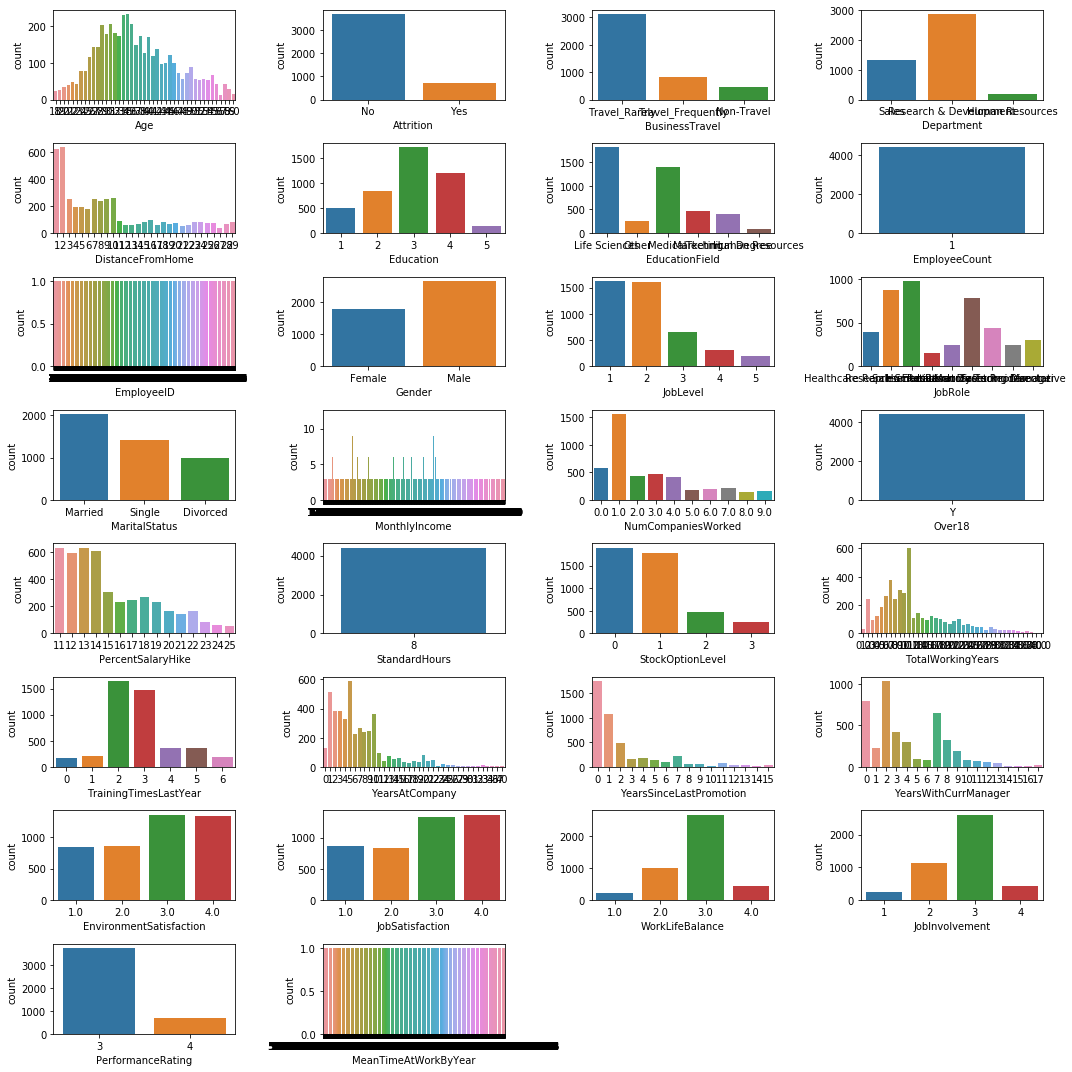

In [8]:
#Display the dataset to see the distribution
if (drawGraphics):
    fig = plt.figure(figsize=(15,15))
    for index,i in enumerate(dataset.columns.tolist()):
        ax=plt.subplot(8,4,index+1)
        sns.countplot(x=i,data=dataset,ax=ax)
    fig.tight_layout()
    plt.show()

### Data distribution with Attrition (sum and percent)



 -------------------------------------------------- ORDINAL --------------------------------------------------


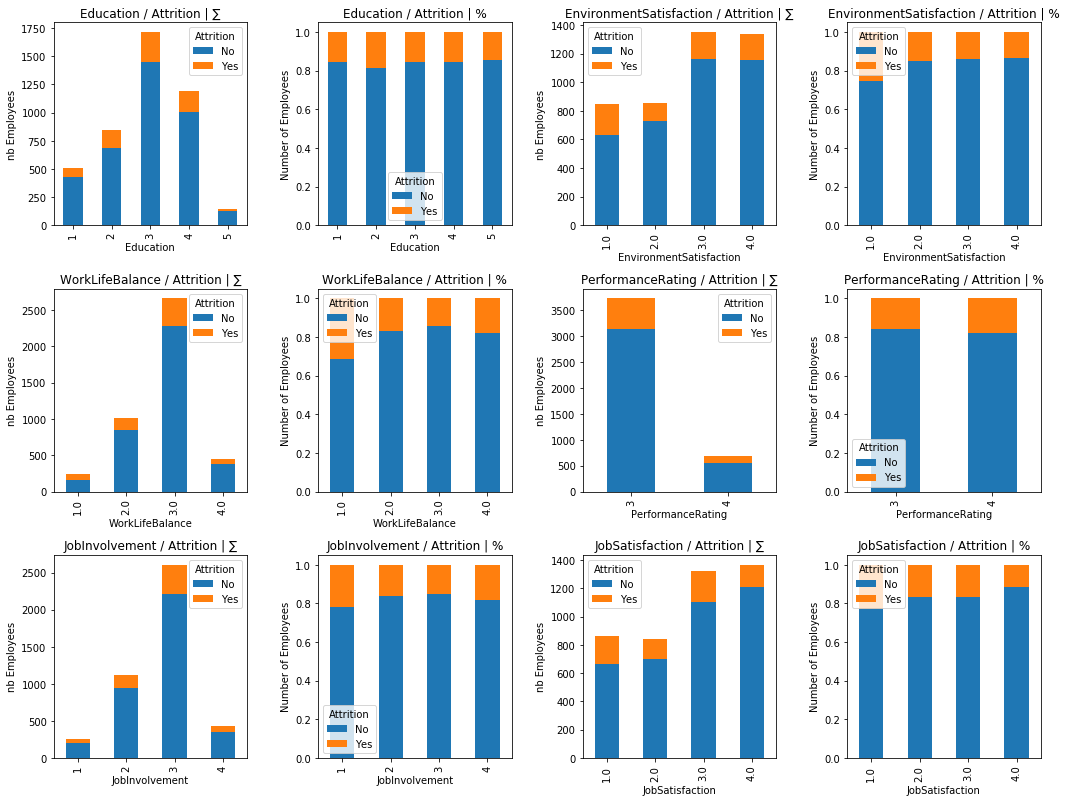



 -------------------------------------------------- NOMINAL --------------------------------------------------


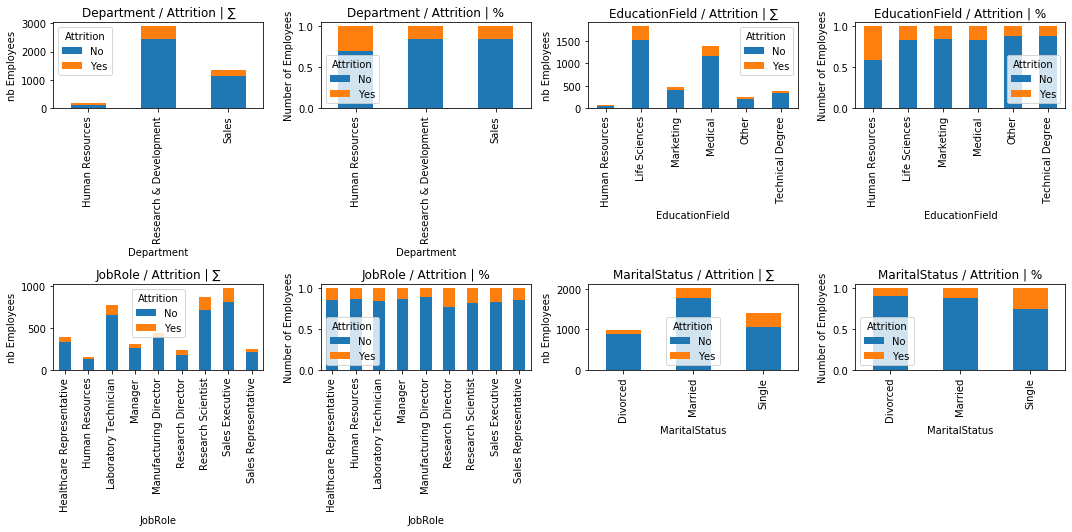

In [9]:
if (drawGraphics):
    #we plot the number of attrition and the percentage of attrition
    def drawAttritionRepart(listColumns):
        fig = plt.figure(figsize=(15,(len(listColumns) / 2) * 3.75))
        for idx,i in enumerate(listColumns):
            index = idx * 2;
            crosstab = pd.crosstab(index=dataset[i], columns=dataset["Attrition"])
            ax1=plt.subplot(len(listColumns) / 2,4,index+1)
            crosstab.plot(kind="bar",stacked=True,ax=ax1)
            plt.title(i + ' / Attrition | ∑')
            plt.xlabel(i)
            plt.ylabel('nb Employees')

            ax2=plt.subplot(len(listColumns) / 2,4,index+2)
            table= pd.crosstab(dataset[i],dataset.Attrition)
            table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax2)
            plt.title(i + ' / Attrition | %')
            plt.xlabel(i)
            plt.ylabel('Number of Employees')

        fig.tight_layout()
        plt.show()

    print("\n\n", "-"*50, "ORDINAL", "-"*50)
    drawAttritionRepart(quanti_ordinal_columns)
    print("\n\n","-"*50, "NOMINAL", "-"*50)
    drawAttritionRepart(nominal_columns)




 -------------------------------------------------- NUMERICAL --------------------------------------------------


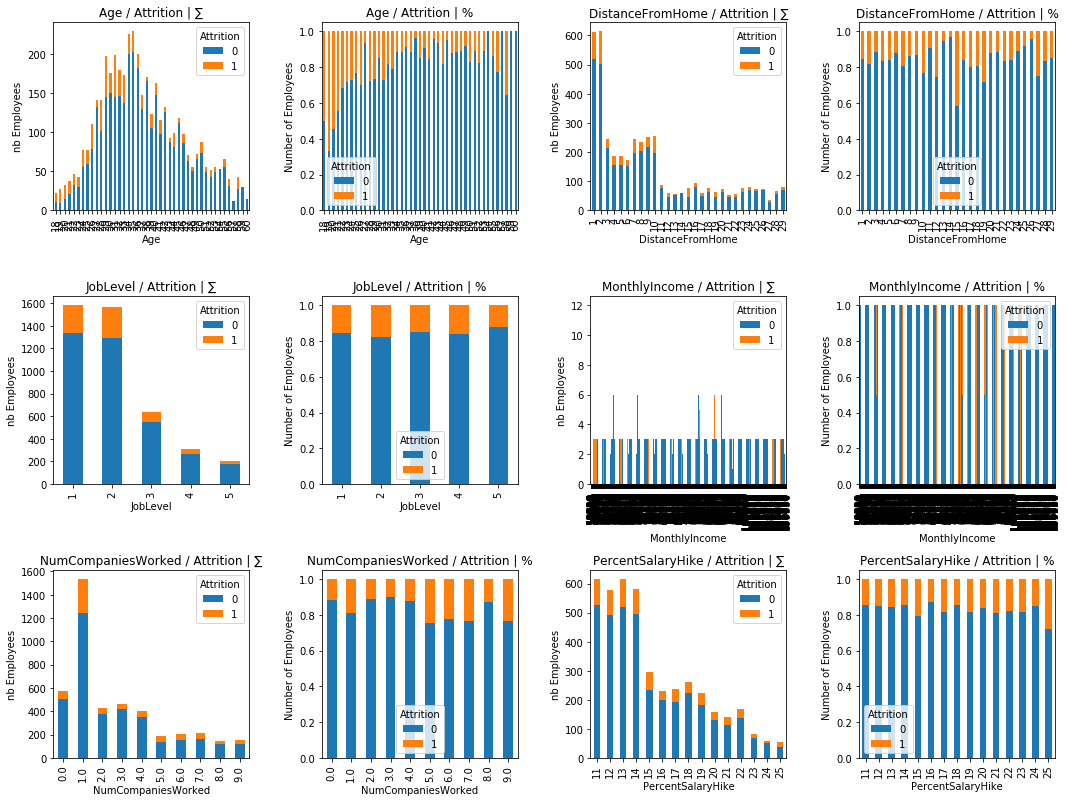

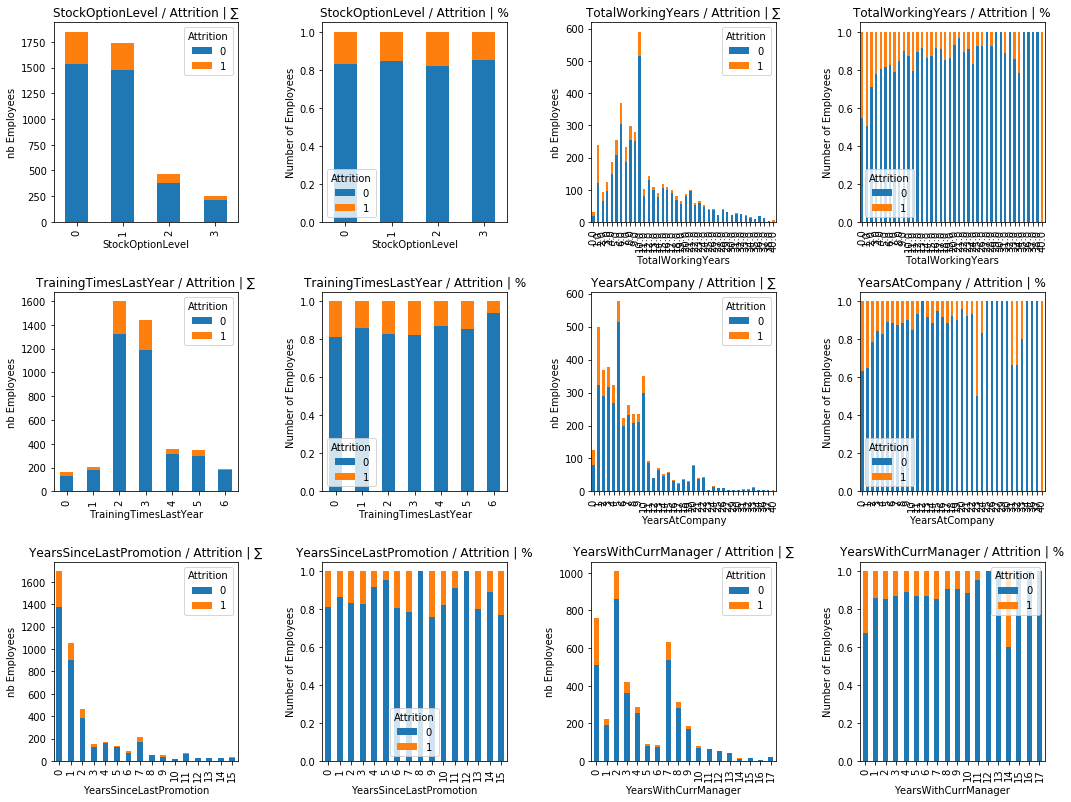

In [29]:
if (drawGraphics):
    print("\n\n", "-"*50, "NUMERICAL", "-"*50)
    drawAttritionRepart(['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike'])
    drawAttritionRepart(['StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

   

In [ ]:
if (drawGraphics):
    print("\n\n", "-"*50, "NUMERICAL", "-"*50)
    drawAttritionRepart(['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike'])
    drawAttritionRepart(['StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

   

In [41]:
drawAttritionRepart(['MeanTimeAtWorkByYear', 'TotalWorkingYears'])


### Data distribution with Attrition second method

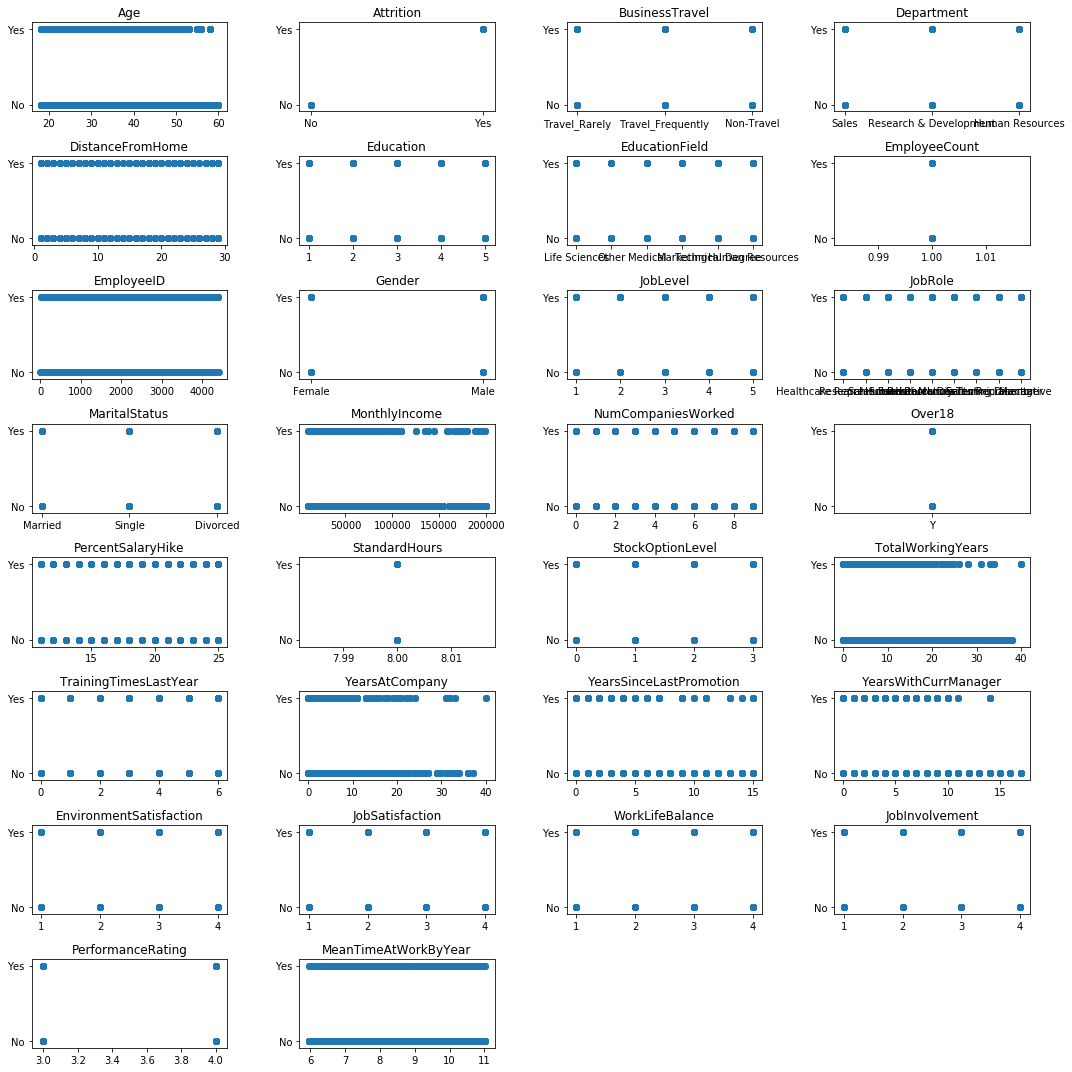

In [11]:
#Display the dataset by attrition to determine trends
if (drawGraphics):
    fig = plt.figure(figsize=(15,15))
    for idx,i in enumerate(dataset.columns.tolist()[:len(dataset) - 2]):
        ax =plt.subplot(8,4,idx+1)
        ax.scatter(dataset[i], dataset.Attrition)
        ax.title.set_text(str(i))
    fig.tight_layout()
    plt.show()

## Correlation of criteria

### Plot pair

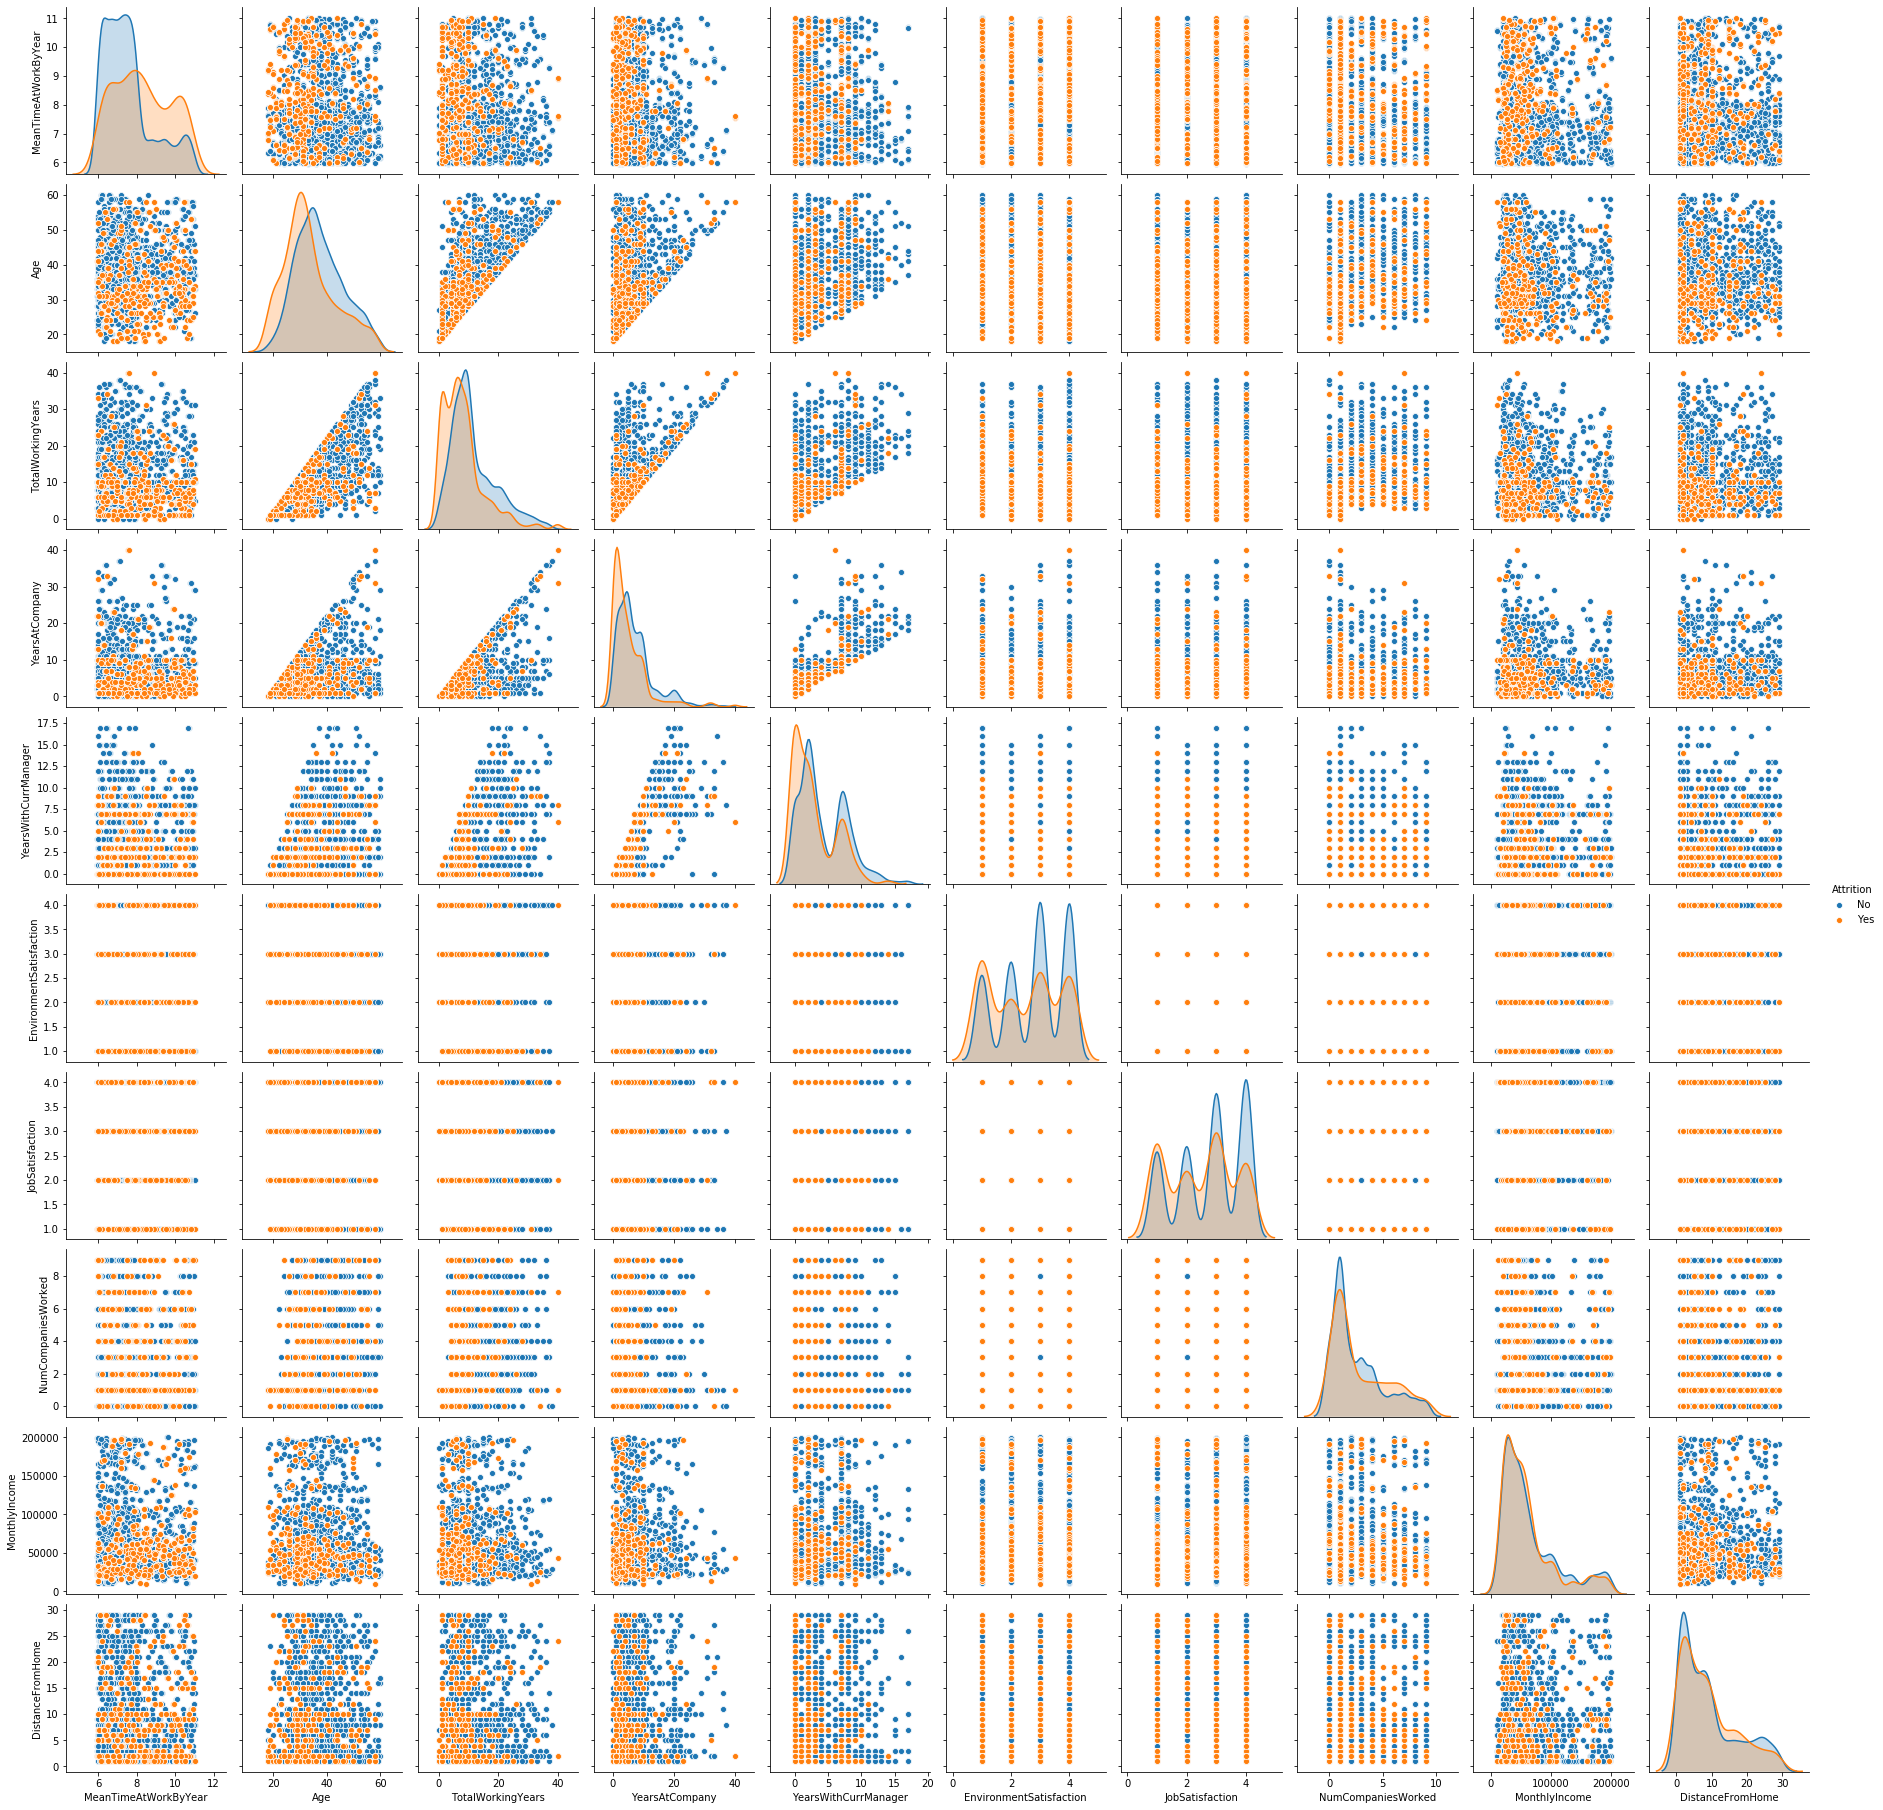

In [12]:
if (drawGraphics):
    #Pair-Plot to see visual trends
    col_to_draw=['MeanTimeAtWorkByYear', 'Age', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'NumCompaniesWorked', 'MonthlyIncome', 'DistanceFromHome']
    num_attrition=col_to_draw+['Attrition']
    sns.pairplot(dataset[num_attrition], hue = 'Attrition')

In [50]:
    col_to_draw=['DistanceFromHome']
#     'TotalWorkingYears', 'Age', 'YearsWithCurrManager', 'EnvironmentSatisfaction'
    num_attrition=col_to_draw+['Attrition']
    sns.pairplot(dataset[num_attrition], hue = 'Attrition')

### Correlation matrix

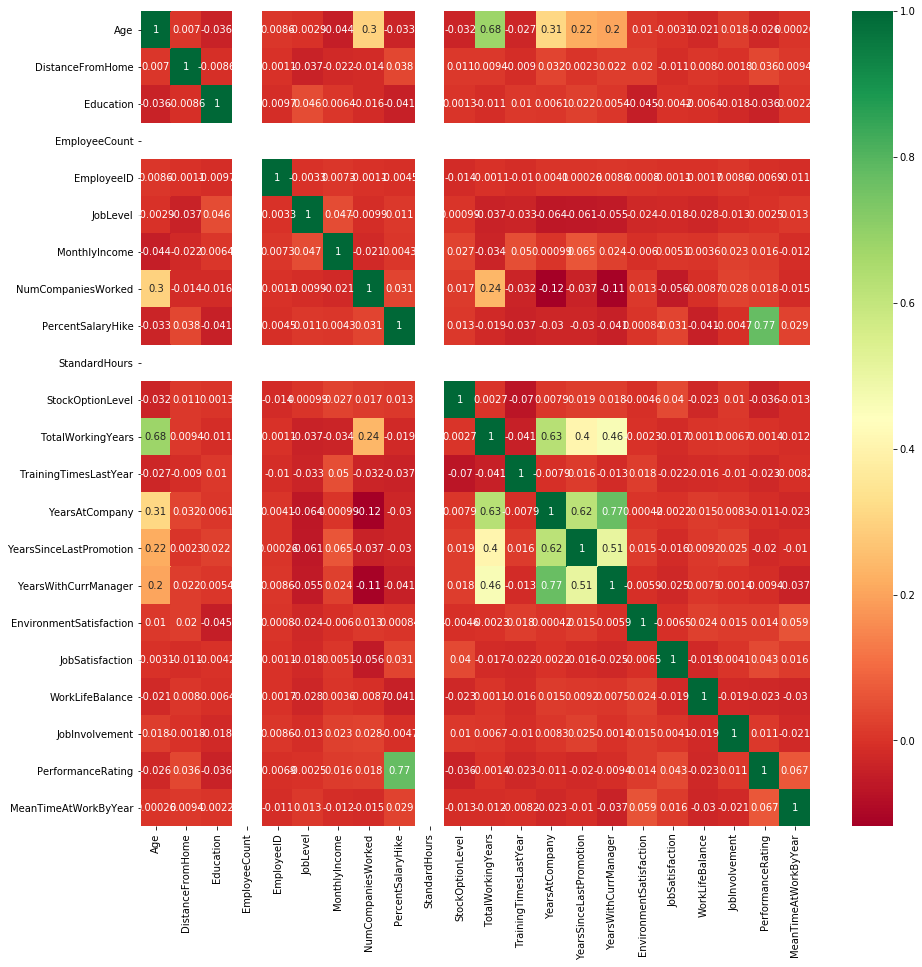

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

if (drawGraphics):
    tempCopy = dataset.drop(['Attrition'], axis=1)
    X = tempCopy.iloc[:,0:43]  #independent columns
    y = dataset.iloc[:,1:2]    #target column i.e attrition
    #get correlations of each features in dataset
    corrmat = dataset.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(15,15))
    #plot heat map
    g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Data processing

## Drop columns

In [14]:
dataset.drop(['StandardHours', 'EmployeeCount', 'Over18'], axis=1, inplace=True)

## Replacement of null-values

In [15]:
print("Number of null values {}".format(dataset.isnull().sum().sum()))
dataset.dropna(inplace=True)
print("Number of null values {}".format(dataset.isnull().any().sum()))

Number of null values 111
Number of null values 0


## duplicate

In [16]:
dataset_duplicates=dataset[dataset.duplicated( keep=False)].shape[0]
if(dataset_duplicates==0):
    print("there is No duplicate elements in dataset")
else:
    print("there is  duplicate elements in dataset")

there is No duplicate elements in dataset


## Modification of text values

In [17]:
# Attrition
dataset.replace({'No': 0, 'Yes':1}, inplace=True)

# Gender & Buisness travel
le = LabelEncoder()
categories = ['BusinessTravel', 'Gender']
for c in categories:
  dataset[c] = le.fit_transform(dataset[c])


dataset = pd.get_dummies(dataset)
# same var but with no attrition
dataset_no_attrition=dataset.drop('Attrition',1)

In [18]:
dataset

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,0,2,6,2,1,0,1,131160,1.0,...,0,0,0,0,0,0,0,0,1,0
1,31,1,1,10,1,2,0,1,41890,0.0,...,0,0,0,0,1,0,0,0,0,1
2,32,0,1,17,4,3,1,4,193280,1.0,...,0,0,0,0,0,1,0,0,1,0
3,38,0,0,2,5,4,1,3,83210,3.0,...,0,0,0,0,0,0,0,0,1,0
4,32,0,2,10,1,5,1,1,23420,4.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,2,4,3,4405,0,2,35390,1.0,...,0,0,0,0,0,0,0,0,0,1
4405,42,0,2,5,4,4406,0,1,60290,3.0,...,0,0,0,0,1,0,0,0,0,1
4406,29,0,2,2,4,4407,1,1,26790,2.0,...,1,0,0,0,0,0,0,1,0,0
4407,25,0,2,25,2,4408,1,2,37020,0.0,...,0,0,0,0,0,1,0,0,1,0


## Split and verification

In [20]:
attrition_label=dataset['Attrition']

X_train, X_test, y_train, y_test = train_test_split(dataset_no_attrition,attrition_label,test_size=0.30,stratify=attrition_label, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train,y_train,test_size=0.30,stratify=y_train, random_state=42)

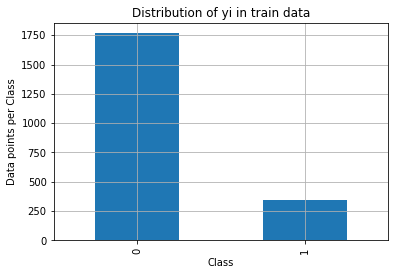

Number of data points in class 0 : 1766 ( 83.816 %)
Number of data points in class 1 : 341 ( 16.184 %)
--------------------------------------------------------------------------------


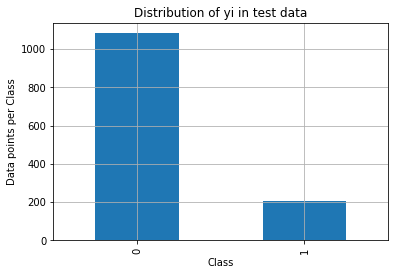

Number of data points in class 1 : 1082 ( 83.876 %)
Number of data points in class 2 : 208 ( 16.124 %)
--------------------------------------------------------------------------------


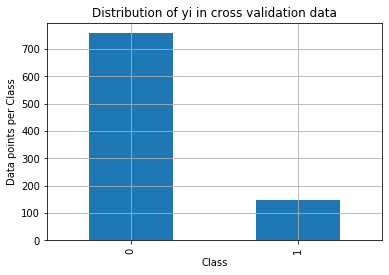

Number of data points in class 1 : 757 ( 83.832 %)
Number of data points in class 2 : 146 ( 16.168 %)


In [21]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts()
test_class_distribution = y_test.value_counts()
cv_class_distribution = y_cv.value_counts()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')

## Scaling data

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.07925866,  0.59200317,  0.1000155 , ..., -0.52921915,
         1.10252554, -0.70157653],
       [-0.73673104, -0.90541661,  0.1000155 , ...,  1.88957639,
        -0.90700847, -0.70157653],
       [ 0.468635  , -0.90541661, -0.99628155, ...,  1.88957639,
        -0.90700847, -0.70157653],
       ...,
       [-0.73673104, -2.40283639, -0.87447076, ..., -0.52921915,
        -0.90700847,  1.42536124],
       [ 0.90694993,  0.59200317,  0.1000155 , ..., -0.52921915,
        -0.90700847,  1.42536124],
       [-0.07925866,  0.59200317, -0.87447076, ..., -0.52921915,
        -0.90700847,  1.42536124]])

# Determining the best criteria

### Forest

we display the match score of the top 10 criteria with the attrition : 

Index


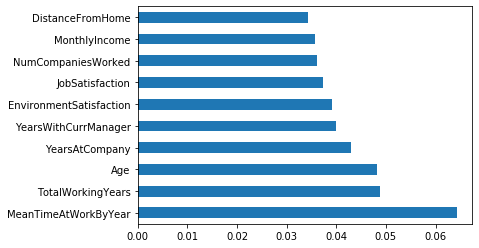

MeanTimeAtWorkByYear       0.064224
TotalWorkingYears          0.048817
Age                        0.048203
YearsAtCompany             0.043035
YearsWithCurrManager       0.039995
EnvironmentSatisfaction    0.039099
JobSatisfaction            0.037349
NumCompaniesWorked         0.036160
MonthlyIncome              0.035640
DistanceFromHome           0.034216
dtype: float64

In [23]:
X = dataset_no_attrition.iloc[:,0:43]  #independent columns
y = dataset.iloc[:,1:2]   #target column i.e attrition
model = ExtraTreesClassifier(n_estimators=250)
model.fit(X,y)

print("we display the match score of the top 10 criteria with the attrition : \n\nIndex")
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
top_ten_features_tree = feat_importances.nlargest(10)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

top_ten_features_tree

# Execution of the models

## Entrainement

## Validation

In [24]:


def get_scores(_models_predictions,_y_ref = y_test):
  _accuracy = []
  _precision = []
  _recall = []
  _F1Score = []
  _roc_score = []

  for each in _models_predictions:
    _accuracy.append(round(accuracy_score(_y_ref,each),3))
    _precision.append(round(precision_score(_y_ref,each),3))
    _recall.append(round(recall_score(_y_ref,each),3))
    _F1Score.append(round(f1_score(_y_ref,each),3))
    _roc_score.append(round(roc_auc_score(_y_ref, each),3))

  return _accuracy,_precision,_recall,_F1Score,_roc_score


def run_models(_models, _X = X_train, _y = y_train,_X_pred = X_test):
  _predictions = []
  for each in _models:
    each.fit(_X,_y)
    _predictions.append(each.predict(_X_pred))
  return _predictions


def get_cross_validate_mean_scores(_models, _X = X_train, _y = y_train, _cv = 5):
  _cv_scores = []
  for each in _models:
    _cv_score = cross_validate(each, _X, _y, cv=_cv)['test_score']
    _cv_scores.append(round(sum(_cv_score)/len(_cv_score),3))
  return _cv_scores

def get_confusion_matrix(_models_predictions, _y_ref):
  cm_list = []
  for each in _models_predictions:
    cm = confusion_matrix(_y_ref, each)
    cm_table = PrettyTable()
    cm_table.field_names = ["", "Positive","Negative"]
    cm_table.add_row([ "Positive" , cm[0][0],cm[0][1] ])
    cm_table.add_row([ "Negative" , cm[1][0],cm[1][1] ])
    cm_list.append(cm_table)

  return cm_list

def draw_roc_graph(_models_predictions,_y_ref,_labels):
  for idx,each in enumerate(_models_predictions):
    x, y, z = roc_curve(_y_ref, each)
    plt.plot(x, y, label=_labels[idx])
  plt.legend() 
  plt.show()


def display_scores(_models_dict, _X = X_train, _y = y_train,_X_pred = X_test, _y_ref = y_test):

  _labels = _models_dict['labels']
  _models = _models_dict['models']

  _models_predictions = run_models(_models, _X, _y, _X_pred)

  _accuracy, _precision,_recall,_F1Score,_roc_score = get_scores(_models_predictions, _y_ref)

  _cv_mean_scores = get_cross_validate_mean_scores(_models, _X, _y)

  score_table = PrettyTable()
  score_table.field_names = ["Score Type"]+_labels
  score_table.add_row([ "Accuracy" ] + _accuracy )
  score_table.add_row([ "Precision" ] + _precision )
  score_table.add_row([ "Recall"] + _recall )
  score_table.add_row([ "F1 Score"] +  _F1Score )
  score_table.add_row([ "Roc" ] + _roc_score )
  score_table.add_row([ "CV mean" ] + _cv_mean_scores )

  print(score_table)
  print("\n\n\n_________________________________________________________________________________\n")
  print("Confusion matrices\n")
  print("_________________________________________________________________________________\n")

  for idx,each in enumerate(get_confusion_matrix(_models_predictions,_y_ref)):
    print( _labels[idx])
    print(each, '\n')

  draw_roc_graph(_models_predictions,_y_ref ,_labels)

In [36]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
forest_clf = RandomForestClassifier(random_state=42, n_estimators=200)
perceptron_clf = Perceptron(random_state=42, alpha=0.001, fit_intercept=True, max_iter=300, shuffle=True, penalty='l1', class_weight='balanced')
svc_clf = SVC(random_state=42, class_weight='balanced')
mlperceptron_clf = MLPClassifier(random_state=42, max_iter=100,alpha=0.0001,hidden_layer_sizes=(100))
sgd_clf = SGDClassifier(max_iter=100, tol=1e-3,class_weight='balanced')

models_dict = {
    'labels':[
              "SVC",
              "Perceptron",
              "MLPerceptron",
              "Random Forest",
              "SGD"
    ],
    'models':[
              svc_clf,
              perceptron_clf,
              mlperceptron_clf,
              forest_clf,
              sgd_clf
    ]
}

display_scores(models_dict)

+------------+-------+------------+--------------+---------------+-------+
| Score Type |  SVC  | Perceptron | MLPerceptron | Random Forest |  SGD  |
+------------+-------+------------+--------------+---------------+-------+
|  Accuracy  | 0.916 |   0.753    |    0.931     |      0.95     | 0.662 |
| Precision  | 0.718 |   0.329    |    0.865     |      0.95     | 0.268 |
|   Recall   | 0.784 |    0.51    |    0.678     |     0.731     | 0.635 |
|  F1 Score  | 0.749 |    0.4     |     0.76     |     0.826     | 0.377 |
|    Roc     | 0.862 |   0.655    |    0.829     |     0.862     | 0.651 |
|  CV mean   | 0.897 |   0.609    |    0.928     |     0.939     | 0.665 |
+------------+-------+------------+--------------+---------------+-------+



_________________________________________________________________________________

Confusion matrices

_________________________________________________________________________________

SVC
+----------+----------+----------+
|          | Positive 

# Conclusion